# 強化学習(Cart-Pole)

In [1]:
# https://github.com/ageron/handson-ml/blob/master/16_reinforcement_learning.ipynb

In [1]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
from __future__ import division, print_function, unicode_literals

import gym
import numpy as np
import os
import sys

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>


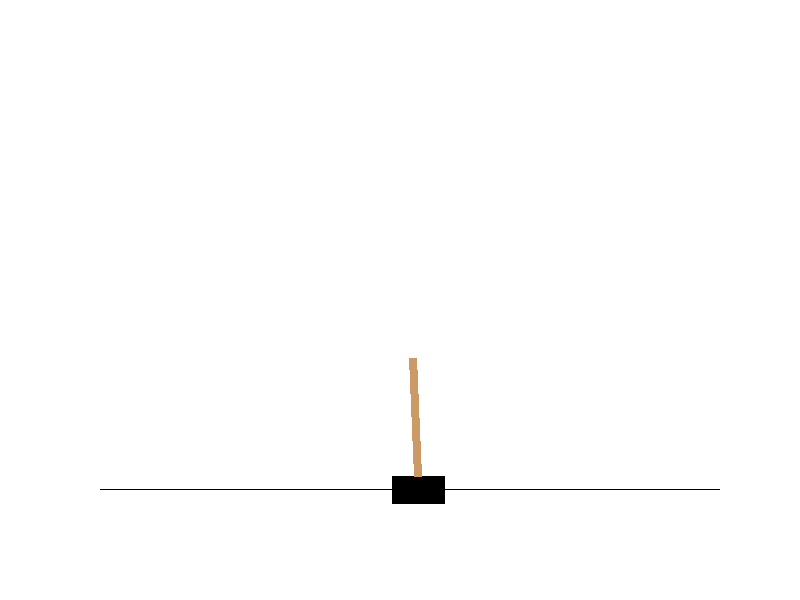

In [3]:
# 環境の読込と初期化
env = gym.make("CartPole-v0")

obs = env.reset()
action = env.action_space.sample()
obs, r, done, info = env.step(action)

plot_cart_pole(env, obs)

In [10]:
print('observation   : {}'.format(obs))  # 現在の状態 [position(カート位置), velocity(カート速度), angle(棒角度:0が垂直、0以上は右の傾き), angular_velocity(角速度)]
print('reward        : {}'.format(r))    # 現在の報酬 (棒の角度が20.9度以内かつ線の範囲内であれば1、それ以外は0)
print('done          : {}'.format(done)) # 終了状態かどうか
print('info          : {}'.format(info)) # デバック用の情報

observation   : [-0.24483542 -1.38209022  0.21845513  1.60257914]
reward        : 1.0
done          : True
info          : {}


In [4]:
# 取りうる行動の選択肢の数(カートを右または左に動かすためDiscreteは「2」となる.左:0、右:1)
env.action_space

Discrete(2)

In [8]:
# ポールの傾きが0以上になるようにカートを移動するように構成
# (右に傾いたら、カートを左に移動.それ以外なら左に移動)

frames = []
i = 0
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    i += 1 
    img = render_cart_pole(env, obs)
    frames.append(img)

    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1

    obs, reward, done, info = env.step(action)
    print (obs, reward, done, info)
    if done:
        break
        
print ("total steps:",i)

[ 0.03922201  0.15560771  0.04794428 -0.25712527] 1.0 False {}
[ 0.04233416  0.35001355  0.04280178 -0.5343087 ] 1.0 False {}
[ 0.04933443  0.54450827  0.0321156  -0.81320371] 1.0 False {}
[ 0.0602246   0.73917598  0.01585153 -1.09561435] 1.0 False {}
[ 0.07500812  0.93408562 -0.00606076 -1.38328191] 1.0 False {}
[ 0.09368983  0.73903979 -0.0337264  -1.0925004 ] 1.0 False {}
[ 0.10847063  0.54437809 -0.0555764  -0.81058758] 1.0 False {}
[ 0.11935819  0.35005981 -0.07178816 -0.53589125] 1.0 False {}
[ 0.12635938  0.15601682 -0.08250598 -0.26666404] 1.0 False {}
[ 0.12947972 -0.03783661 -0.08783926 -0.00110228] 1.0 False {}
[ 0.12872299 -0.23159618 -0.08786131  0.262625  ] 1.0 False {}
[ 0.12409106 -0.42536129 -0.08260881  0.52635353] 1.0 False {}
[ 0.11558384 -0.61922961 -0.07208174  0.79190495] 1.0 False {}
[ 0.10319925 -0.81329179 -0.05624364  1.06106864] 1.0 False {}
[ 0.08693341 -1.00762564 -0.03502227  1.33558156] 1.0 False {}
[ 0.0667809  -1.2022892  -0.00831063  1.61710341] 1.0 F

<IPython.core.display.Javascript object>


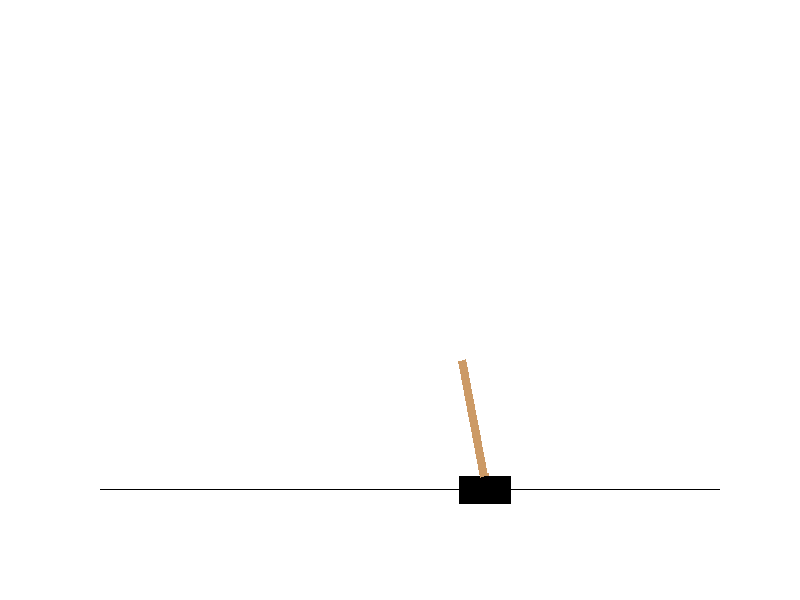

In [9]:
# ステップの可視化
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

video = plot_animation(frames)
plt.show()

In [10]:
# DQN によるカートポールの制御

import tensorflow as tf

reset_graph()

n_inputs = 4
n_hidden = 4
n_outputs = 1

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits)  
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
def discount_rewards (rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std for discounted_rewards in all_discounted_rewards]

In [12]:
env = gym.make("CartPole-v0")

n_games_per_update = 10
n_max_steps = 1000
n_iterations = 50
save_iterations = 20
discount_rate = 0.95

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}".format(iteration), end="")
        all_rewards = []
        all_gradients = []
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)})
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)

        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index]
                                      for game_index, rewards in enumerate(all_rewards)
                                          for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./DQN.ckpt")
env.close()
print ("  total steps:",step)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Iteration: 49  total steps: 76


<IPython.core.display.Javascript object>


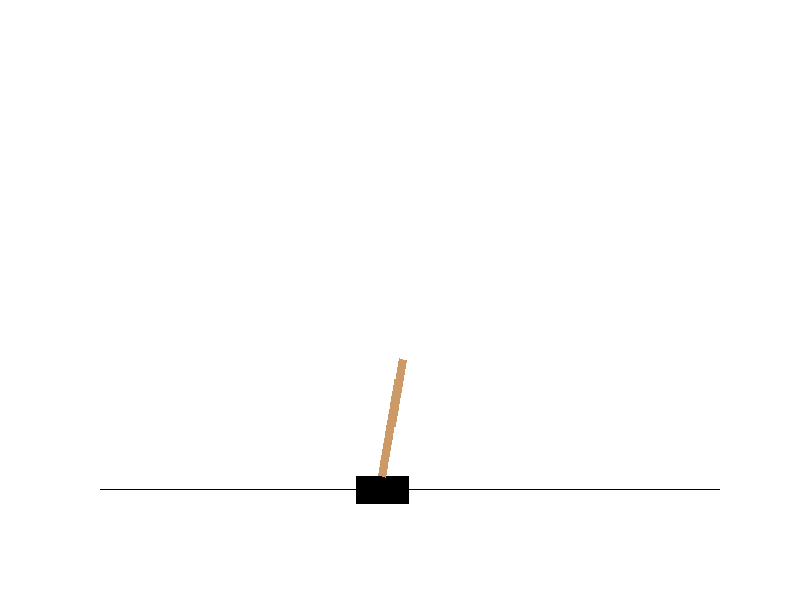

In [11]:
video = plot_animation(frames)
plt.show()

In [ ]:
# カーネルリセット&GPUメモリ解放
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()